In [1]:
import gc
import os
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
plt.figure(figsize=(8, 7))

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

In [2]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)], os.listdir(directory)

In [3]:
def extract_mel_spectrogram(path, name):
    gc.collect()
    y, sr = librosa.load(path)
    mel_signal = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 512, n_fft = 2048)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis = 'mel', cmap = 'magma', hop_length=512)
    plt.axis('off')
    plt.savefig(destination_path + "\\" + name[:-4] + ".png", dpi = 600)
    #plt.show()

In [4]:
source_path = r"C:\Users\Karan\Desktop\DSMT\Final-Project\Split_Audio_Dataset\Validation_Dataset\street_music"
destination_path = r"C:\Users\Karan\Desktop\DSMT\Final-Project\Spectrogram_Dataset\Validation_Data\street_music"
l, r = list_full_paths(source_path)

100%|██████████| 100/100 [03:02<00:00,  1.82s/it]


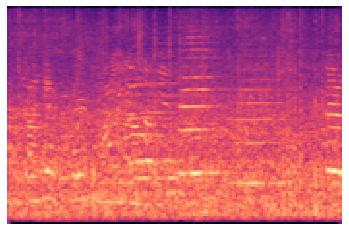

In [5]:
from tqdm import tqdm
for i in tqdm(range(len(l))):
    extract_mel_spectrogram(l[i], r[i])